Q. 1. The neural network has the following hyper parameters and input:
Choose random weights and bias of the neuron and learning rate =01 and inputs to the
neuron and target values are as follows.

X1=4,2,1,3,1,6

X2=1,8,0,2,4,7

Y=2,14,1,-1,-7,8

(a).Write a python code for predicted the output of neural network for given set of inputs using
Stochastic Gradient Descent algorithm for the loss functions: ((i) Mean Square Error (ii) Huber Loss
(iii) Squared Epsilon Hinge Loss (iv) Mean Absolute Error Loss
(b) Plot comparative loss curve for at least 500 epochs.

In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
class Neural_network():
    def __init__(self):
        np.random.seed(1)
        self.synaptic_weights = 2 * np.random.random((2, 1)) - 1
    
    def MAE(self,target ,y_hat):
        return(np.sum(abs(y_hat-target))/target.shape[1])
    
    def MSE(self,target,y_hat):
        A=np.sum((y_hat-target)**2)
        return(A/2*len(y_hat))
        
    def Huber(self, target,y_hat, delta=1.):
        return(np.where(np.abs(target-y_hat) < delta,.5*(target-y_hat)**2 , delta*(np.abs(target-y_hat)-0.5*delta)))
#         if(abs(target-y_hat).all<delta):
#             return(0.5*(target-y_hat)**2)
#         else:
#             return(delta((target-y_hat)-delta/2))
        
    def squared_Epsilon_hinge(self,y_pred,true):
        epsilon = 0.1
        loss = 0.5*(np.maximum(((y_pred-true)**2-epsilon**2),0.0))
        return(loss)
        
    def forward(self,W,X):
        return(np.dot(X,W.T))
    


In [3]:
Neural_net=Neural_network()

In [4]:
inputs = np.array([[4, 1], [2, 8], [1, 0], [3, 2], [1, 4], [6, 7]])
outputs = np.array([[2, -14, 1, -1, -7, -8]]).T
print(inputs.shape)
print(outputs.shape)

(6, 2)
(6, 1)


In [5]:
one = np.ones((inputs.shape[0], 1))  
X = np.concatenate((inputs, one), axis=1) 
weights = (Neural_net.synaptic_weights).T
b = np.zeros((weights.shape[0], 1))
W = np.concatenate((weights, b), axis=1) 
print(W.shape)

(1, 3)


In [6]:
iterations=1000
learning_rate=0.001

In [7]:
                                      """ Squared Epsilon Hinge Loss """
loss_plot=[]
for j in range(iterations):
    y_pred = Neural_net.forward(W, X)
    delta1 = (y_pred - outputs)
    loss = Neural_net.squared_Epsilon_hinge(y_pred, outputs)
    loss = np.mean(loss)
    W = W - (learning_rate *np.matmul(delta1.T,X))
    loss_plot.append(loss)
print(W)

[[ 0.99680038 -2.00104754  0.01678591]]


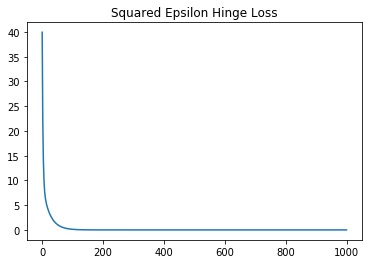

[[  2.00293989]
 [-13.99799362]
 [  1.01358629]
 [ -0.99490803]
 [ -6.99060386]
 [ -8.00974457]]


In [8]:
plt.title("Squared Epsilon Hinge Loss")
plt.plot(loss_plot)
plt.show()
y_actual = Neural_net.forward(W, X)
print(y_actual)
    

[[ 0.99680038 -2.00104754  0.01678591]]


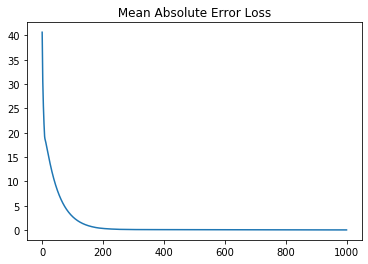

[[  2.00293989]
 [-13.99799362]
 [  1.01358629]
 [ -0.99490803]
 [ -6.99060386]
 [ -8.00974457]]


In [9]:
                                              """ Mean Absolute Error Loss """
Neural_net=Neural_network()
inputs = np.array([[4, 1], [2, 8], [1, 0], [3, 2], [1, 4], [6, 7]])
outputs = np.array([[2, -14, 1, -1, -7, -8]]).T
one = np.ones((inputs.shape[0], 1))  
X = np.concatenate((inputs, one), axis=1) 
weights = (Neural_net.synaptic_weights).T
b = np.zeros((weights.shape[0], 1))
W = np.concatenate((weights, b), axis=1) 
iterations=1000
learning_rate=0.001
loss_plot=[]
for j in range(iterations):
    y_pred = Neural_net.forward(W, X)
    delta1 = (y_pred - outputs)
    loss = Neural_net.MAE(y_pred, outputs)
    loss = np.mean(loss)
    W = W - (learning_rate *np.matmul(delta1.T,X))
    loss_plot.append(loss)
print(W)
plt.title(" Mean Absolute Error Loss ")
plt.plot(loss_plot)
plt.show()
y_actual = Neural_net.forward(W, X)
print(y_actual)

[[ 0.99680038 -2.00104754  0.01678591]]


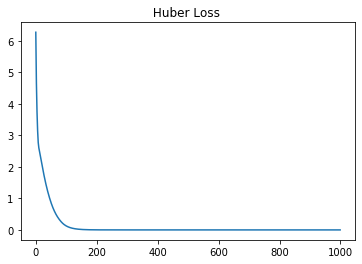

[[  2.00293989]
 [-13.99799362]
 [  1.01358629]
 [ -0.99490803]
 [ -6.99060386]
 [ -8.00974457]]


In [10]:
                                              """ Huber Loss  """
Neural_net=Neural_network()
inputs = np.array([[4, 1], [2, 8], [1, 0], [3, 2], [1, 4], [6, 7]])
outputs = np.array([[2, -14, 1, -1, -7, -8]]).T
one = np.ones((inputs.shape[0], 1))  
X = np.concatenate((inputs, one), axis=1) 
weights = (Neural_net.synaptic_weights).T
b = np.zeros((weights.shape[0], 1))
W = np.concatenate((weights, b), axis=1) 
iterations=1000
learning_rate=0.001
loss_plot=[]
for j in range(iterations):
    y_pred = Neural_net.forward(W, X)
    delta1 = (y_pred - outputs)
    loss = Neural_net.Huber(y_pred, outputs)
    loss = np.mean(loss)
    W = W - (learning_rate *np.matmul(delta1.T,X))
    loss_plot.append(loss)
print(W)
plt.title(" Huber Loss  ")
plt.plot(loss_plot)
plt.show()
y_actual = Neural_net.forward(W, X)
print(y_actual)

[[ 0.99680038 -2.00104754  0.01678591]]


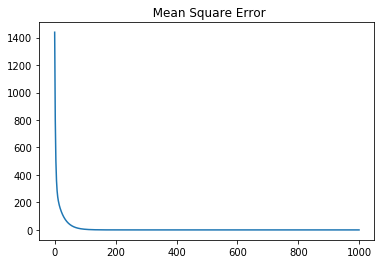

[[  2.00293989]
 [-13.99799362]
 [  1.01358629]
 [ -0.99490803]
 [ -6.99060386]
 [ -8.00974457]]


In [11]:
                                              """  Mean Square Error """
Neural_net=Neural_network()
inputs = np.array([[4, 1], [2, 8], [1, 0], [3, 2], [1, 4], [6, 7]])
outputs = np.array([[2, -14, 1, -1, -7, -8]]).T
one = np.ones((inputs.shape[0], 1))  
X = np.concatenate((inputs, one), axis=1) 
weights = (Neural_net.synaptic_weights).T
b = np.zeros((weights.shape[0], 1))
W = np.concatenate((weights, b), axis=1) 
iterations=1000
learning_rate=0.001
loss_plot=[]
for j in range(iterations):
    y_pred = Neural_net.forward(W, X)
    delta1 = (y_pred - outputs)
    loss = Neural_net.MSE(y_pred, outputs)
    loss = np.mean(loss)
    W = W - (learning_rate *np.matmul(delta1.T,X))
    loss_plot.append(loss)
print(W)
plt.title("  Mean Square Error ")
plt.plot(loss_plot)
plt.show()
y_actual = Neural_net.forward(W, X)
print(y_actual)

Q. 2. Build a model to recognize diabetes-from pima-indians-diabetes-database.(i)Use Stochastic
gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the
model for loss functions (a) binary cross entropy (b) Dice Loss (c) tversky loss_ (d) Focal loss (e)
Lovazs softmax loss
(ii) Print confusion matrix
(iii) Calculate classification metrics such as precision, recall, f1-score and accuracy each loss function

In [252]:
# binary classification with logistic regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [254]:
data = pd.read_csv('prima_dataset.csv')
data.shape

(768, 9)

In [255]:
# normalization
data_norm = np.linalg.norm(np.array(data.iloc[:,0:8]),axis = 1,keepdims = True)
final_data = np.array(data.iloc[:,0:8])/data_norm

In [256]:
#
X_train = np.array(final_data[0:650 ,0:8])
X_test = np.array(final_data[650: ,0:8])
X_train = X_train.astype('float')
X_test = X_test.astype('float')
print(X_train.shape ,X_test.shape)



(650, 8) (118, 8)


In [257]:
Y_train=np.array([data.iloc[0:650,8]]).T
Y_test = np.array([data.iloc[650: ,8]]).T
Y_train = Y_train.astype('float')
Y_test = Y_test.astype('float')
print(Y_train.shape)
print(Y_train[:10])


(650, 1)
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [258]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [9]:
def bce_loss( y_enc, output):
        cost = -y_enc * (np.log10(output))-(1 - y_enc) * np.log10(1 - output)
        return cost
    def dice_loss(y_enc, output):
        numerator = 2 * tf.reduce_sum(y_enc * output, axis=-1)
        denominator = tf.reduce_sum(y_enc + output, axis=-1)
        cost = 1 - ((numerator + 1) / (denominator + 1))
        return cost
    def focal_loss( y_enc, output):
        gamma = np.random.uniform(0,5)
        alpha = np.random.uniform(0,1)
        cost = -(alpha*(1-output)**gamma)*y_enc * (np.log10(output))-((1-alpha)*(output)**gamma)*(1 - y_enc) * np.log10(1 - output)
        return cost
    def tseversky_loss() y_enc, output):
        beta = 0.5
        num = output*y_enc
        denom = num+beta*(1-y_enc)*output+(1-beta)*y_enc*(1-output)
        cost = num/denom
        return cost

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [259]:
def forward(X ,W ,b):
    a = np.dot(X,W) + b
    Z= sigmoid(a)
    return a ,Z

In [260]:
def cost(label,yh):
    m = label.shape[0]
    
    j = (np.sum(1 * ((label) * np.log(yh) + (1-label)* np.log(1 - yh))))
    return -j/m
    

In [261]:
w = np.random.rand(8,1)*0.01
b = 0
a,z =forward(X_train ,w ,b)

print(z[:10])
#print(b.shape)
loss = cost(Y_train ,z)
print(loss)

[[0.50311037]
 [0.50334023]
 [0.50242622]
 [0.50310547]
 [0.50272754]
 [0.50281045]
 [0.50323597]
 [0.502133  ]
 [0.50204356]
 [0.50286723]]
0.6951570750617435


In [272]:
lr = 0.01
epochs = 50000

In [277]:
total_loss=[]
for i in range(epochs):
    a ,z = forward(X_train,w ,b)
    
    m = z.shape[0]
    loss = cost(Y_train ,z)
    
    dz = z - Y_train
    dw = np.dot(X_train.T , dz)/m
    db = np.mean(dz)
    w = w - lr * dw
    b = b - lr * db
    
    
    total_loss.append(loss)
    if(i%500==0):
        print("number of epochs {0} cost is {1} ".format(i , loss))
    


number of epochs 0 cost is 0.5945122441735012 
number of epochs 500 cost is 0.5945121522761273 
number of epochs 1000 cost is 0.5945120604204657 
number of epochs 1500 cost is 0.5945119686064935 
number of epochs 2000 cost is 0.5945118768341874 
number of epochs 2500 cost is 0.5945117851035243 
number of epochs 3000 cost is 0.5945116934144812 
number of epochs 3500 cost is 0.5945116017670349 
number of epochs 4000 cost is 0.5945115101611624 
number of epochs 4500 cost is 0.5945114185968408 
number of epochs 5000 cost is 0.5945113270740466 
number of epochs 5500 cost is 0.5945112355927572 
number of epochs 6000 cost is 0.5945111441529493 
number of epochs 6500 cost is 0.5945110527546 
number of epochs 7000 cost is 0.5945109613976863 
number of epochs 7500 cost is 0.5945108700821852 
number of epochs 8000 cost is 0.5945107788080738 
number of epochs 8500 cost is 0.594510687575329 
number of epochs 9000 cost is 0.5945105963839279 
number of epochs 9500 cost is 0.5945105052338476 
number o

In [278]:
def predict(yh , label):
    y_pred = (yh[:]>=.5).astype('float')    #with astype('uint8') accuracy showing -333 so change to float
    predict = 1- np.mean(np.abs(y_pred -label))
    return (predict*100)

train_acc = 66.76923076923077 %


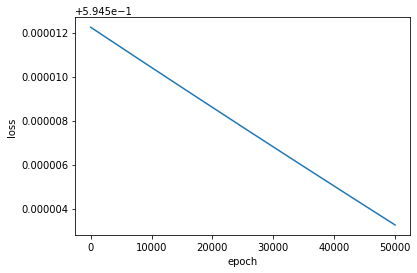

In [279]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot( np.arange(epochs), total_loss) #plotting cost vs epoch
prediction = predict(z , Y_train )
print("train_acc =", prediction , "%")  

In [280]:

yh_pred = sigmoid(np.dot(X_test,w) + b)
test_prediction = predict(yh_pred , Y_test)
print('Test_Accuracy:',test_prediction,'%')


Test_Accuracy: 62.71186440677966 %


In [281]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 

In [282]:
Y_pred = yh_pred.astype('int')
Y_test = Y_test.astype('int')
print(Y_test.shape)
print(Y_pred.shape)
actual = Y_test 

predicted = Y_pred

results = confusion_matrix(actual, predicted) 
accu_predicted=accuracy_score(actual, predicted)
precison=precision_score(actual, predicted, average=None)
recall=recall_score(actual, predicted,average=None)
F1=f1_score(actual, predicted,average=None)
report=classification_report(actual, predicted)

print("Confusion Matrix:")
print(results)
print("Predicted Accuarcy :")
print(accu_predicted)
print("Precison score :")
print(precison)
print("Recall score :")
print(recall)
print("F1 score :")
print(F1)
print("Accuracy Report :",report) 


(118, 1)
(118, 1)
Confusion Matrix:
[[73  0]
 [45  0]]
Predicted Accuarcy :
0.6186440677966102
Precison score :
[0.61864407 0.        ]
Recall score :
[1. 0.]
F1 score :
[0.76439791 0.        ]
Accuracy Report :               precision    recall  f1-score   support

           0       0.62      1.00      0.76        73
           1       0.00      0.00      0.00        45

    accuracy                           0.62       118
   macro avg       0.31      0.50      0.38       118
weighted avg       0.38      0.62      0.47       118



In [1]:
#Nueral Network
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 


In [2]:
data = pd.read_csv('prima_dataset.csv')
data.shape

(768, 9)

In [3]:
data_norm = np.linalg.norm(np.array(data.iloc[:,0:8]),axis = 1,keepdims = True)
final_data = np.array(data.iloc[:,0:8])/data_norm

In [4]:
X_train = np.array(final_data[0:650 ,0:8]).T
X_test = np.array(final_data[650: ,0:8]).T
X_train = X_train.astype('float')
X_test = X_test.astype('float')
print(X_train.shape ,X_test.shape)
Y_train=np.array([data.iloc[0:650,8]])
Y_test = np.array([data.iloc[650: ,8]])
Y_train = Y_train.astype('float')
Y_test = Y_test.astype('float')
print(Y_train.shape)
print(Y_test.shape)
#print(Y_train[:10])

(8, 650) (8, 118)
(1, 650)
(1, 118)


In [5]:
np.random.seed(1)

In [7]:
n_x = X_train.shape[0]
n_h = 5
n_y = Y_train.shape[0]
print(n_x,n_y)

8 1


In [8]:
def ini_parameter(n_x ,n_h ,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h ,n_x) * .01
    b1 =np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* .01
    b2 = np.zeros((n_y ,1))
    
   
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))



In [10]:
def forward_propagation(X , parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) +b1
    
    A1 =np.tanh(Z1)
   
    Z2 = np.dot(W2,A1) + b2
   
    A2 =sigmoid(Z2)
    
    
    cache = {"Z1":Z1,
            "A1" : A1,
             "Z2" : Z2,
            "A2" : A2}
    
    return A2,cache
    

In [11]:
def compute_cost(A2 ,Y , parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) /m
    cost = float(np.squeeze(cost))
    return cost


In [12]:
def backward_propogation(parameters,cache,X,Y):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    A1= cache["A1"]
    Z1 =cache["Z1"]
    A2 =cache["A2"]
    Z2 =cache["Z2"]
    
    m =X.shape[1]
    dZ2 = A2 -Y
    dW2= 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2 ,axis=1,keepdims =True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = 1/m * np.dot(dZ1 ,X.T)
    db1= 1/m * np.sum(dZ1 ,axis =1 ,keepdims = True)
    
    grads = {"dW2":dW2,
            "db2":db2,
            "dW1" : dW1,
            "db1": db1}
    
    return grads
    

In [15]:
def update_parameters(parameters ,grads ,lr):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - lr * dW1
    b1 = b1 -lr *db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    
    parameters={"W1" : W1,
               "b1" : b1,
               "W2" : W2,
               "b2" : b2}
    return parameters
    
    
    
    
    

In [16]:
def nn_model(X,Y,n_h,num_iter ,print_cost =False):
    np.random.seed(3)
    n_y = Y.shape[0] 
    n_x  =X.shape[0]
    parameters =ini_parameter(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    total_cost = []
    
    for i in range(0,num_iter):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        total_cost.append(cost)
        grads = backward_propogation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads ,0.1)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return parameters,total_cost
        
        

In [17]:
parameters ,total_cost = nn_model(X_train, Y_train, 4, num_iter=10000, print_cost=True)

Cost after iteration 0: 0.693204
Cost after iteration 1000: 0.642679
Cost after iteration 2000: 0.629681
Cost after iteration 3000: 0.609626
Cost after iteration 4000: 0.605763
Cost after iteration 5000: 0.601384
Cost after iteration 6000: 0.595972
Cost after iteration 7000: 0.590390
Cost after iteration 8000: 0.584986
Cost after iteration 9000: 0.579879


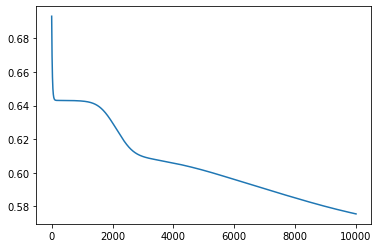

In [18]:
plt.plot(total_cost)
plt.show()

In [19]:
def predict(parameters ,X):
    A2 ,cache = forward_propagation(X ,parameters)
    
    prediction = np.round(A2)
    return prediction

In [23]:
yh_pred = predict(parameters,X_test)
print(Y_test.shape)
print(yh_pred.shape)
actual=Y_test[0]

predicted = yh_pred[0]


(1, 118)
(1, 118)


In [24]:
results = confusion_matrix(actual, predicted) 
accu_predicted=accuracy_score(actual, predicted)
precison=precision_score(actual, predicted, average=None)
recall=recall_score(actual, predicted,average=None)
F1=f1_score(actual, predicted,average=None)
report=classification_report(actual, predicted)

print("Confusion Matrix:")
print(results)
print("Predicted Accuarcy :")
print(accu_predicted)
print("Precison score :")
print(precison)
print("Recall score :")
print(recall)
print("F1 score :")
print(F1)
print("Accuracy Report :",report) 


Confusion Matrix:
[[66  7]
 [33 12]]
Predicted Accuarcy :
0.6610169491525424
Precison score :
[0.66666667 0.63157895]
Recall score :
[0.90410959 0.26666667]
F1 score :
[0.76744186 0.375     ]
Accuracy Report :               precision    recall  f1-score   support

         0.0       0.67      0.90      0.77        73
         1.0       0.63      0.27      0.38        45

    accuracy                           0.66       118
   macro avg       0.65      0.59      0.57       118
weighted avg       0.65      0.66      0.62       118



Q. 3. Build a model to recognize Iris-setosa, Iris -virginica and Iris-versicolor from the Iris Dataset
which contains four features (length and width of sepals and petals) of 50 samples of three species of
Iris (Iris setosa, Iris virginica and Iris versicolor. (i)Visualize data by boxplot of Sepal Length & Sepal
width and Petal Length and width for three IRIS species.
(ii) Use Stochastic gradient descent algorithm to learn model with parameters for α = 0.01 and random
parameters of the model for loss functions (a) Softmax loss (b) Focal loss (c) Lovazs softmax loss
(iii) Print confusion matrix


(iv) Calculate classification metrics such precision, recall, f1-score, and accuracy of Iris-setosa, Iris-
versicolor, Iris-virginica for each loss function


(v) Visualize classified data by Scatter plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.special import expit
import sys
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 

In [3]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
yt_train = y_train.reshape(y_train.shape[0],1) 
yt_test = y_test.reshape(y_test.shape[0],1)

xt_train = X_train.T
xt_test = X_test.T
print(xt_train.shape ,xt_test.shape)

(4, 120) (4, 30)


In [5]:
#one hot encoding
def one_hot_encoding(C ,y):     #C is no_of_classes in the dataset
    label = (np.eye(C)[y.reshape(-1)]).T
    return label

labels = one_hot_encoding(3 , yt_train)
print(labels.shape)

(3, 120)


In [54]:
def layer_size(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 7
    return (n_x,n_h,n_y)

In [50]:
(n_x ,n_h ,n_y) = layer_size(xt_train ,labels)
print(n_x ,n_h,n_y)

4 2 3


In [58]:
def initialize_parameters(n_x,n_h,n_y):
   # np.random.seed(2)
    W1 = np.zeros((n_h,n_x))
    W2  =np.zeros((n_y ,n_h))
    b1 = np.zeros((n_h ,1))
    b2 = np.zeros((n_y ,1))
    
    parameters = {"W1" :W1,
                 "W2" : W2,
                 "b1" : b1,
                 "b2" :b2}
    return parameters

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [11]:
def softmax(a):                                
    z = np.exp(a)
    s = np.sum(z , axis =1 ,keepdims = True)
    return z/s

In [12]:
def forward_propagation(X ,parameters):
    W1= parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1=np.dot(W1 ,X) +b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2 ,A1) +b2
    A2 = softmax(Z2)
   # print(A2.shape)
    
    assert(A2.shape == (3, X.shape[1]))
    
    cache = {"Z1" : Z1,
            "Z2" : Z2,
            "A1" : A1,
            "A2" : A2}
    return A2 ,cache

In [13]:
initialize_parameters(n_x ,n_h ,n_y)

{'W1': array([[-0.00762524, -0.01750946, -0.00710378, -0.00089172],
        [-0.01338739, -0.01256217, -0.00624361, -0.01365486],
        [ 0.00737838, -0.00052454,  0.00206413,  0.00847374]]),
 'W2': array([[-0.00398237,  0.00771505, -0.01190055],
        [ 0.00703729, -0.01152311, -0.00754052],
        [ 0.01084571,  0.00041956,  0.00232554]]),
 'b1': array([[0.],
        [0.],
        [0.]]),
 'b2': array([[0.],
        [0.],
        [0.]])}

In [17]:
parameters = initialize_parameters(n_x,n_h,n_y)
(A2 ,cache) = forward_propagation(xt_train , parameters)

In [18]:
def compute_cost(A2, Y ,parameters):
    m =Y.shape[1]
    cost= -np.sum(np.log(A2) * Y , axis =1 , keepdims = True)
    cost = cost/m
    loss = np.sum(cost , axis =0 ,keepdims =True)
    return loss

In [19]:
cost = compute_cost(A2 , labels ,parameters)
print(cost)

[[4.78750634]]


In [21]:
def backward_propogation(parameters ,cache,X ,Y):
    m =Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2 ,A1.T)
    db2 = 1/m *np.sum(dZ2 ,axis =1 ,keepdims =True)
    dZ1 = np.dot(W2.T,dZ2) * sigmoid(A1) * sigmoid(1.0 - A1)
    dW1 = 1/m * np.dot(dZ1 , X.T)
    db1 = 1/m * np.sum(dZ1 , axis =1 , keepdims = True)
    
    grads = {"dW2" : dW2,
            "dW1" : dW1,
            "db1" : db1,
            "db2" : db2}
    return grads

In [24]:
 grads = backward_propogation(parameters ,cache ,xt_train , labels)

In [25]:
def update_parameters(parameters ,grads ,lr):
    W1 =parameters["W1"]
    W2 = parameters["W2"]
    b1 =parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]  
    
    W1 = W1  - lr * dW1
    b1 = b1 -  lr * db1
    W2 = W2 -  lr * dW2
    b2 = b2 -  lr * db2
    
    parameters = {"W1" :W1,
                 "b1" :b1 ,
                 "W2" : W2,
                 "b2" :b2}
    return parameters

In [26]:
update_parameters(parameters , grads ,0.1)

{'W1': array([[-0.00523842, -0.00456253, -0.00683036, -0.0035154 ],
        [ 0.00622374, -0.00685998, -0.01431154,  0.00592225],
        [ 0.01234592, -0.0044723 ,  0.01012342,  0.00653393]]),
 'b1': array([[-4.31094497e-05],
        [ 4.56475711e-05],
        [ 3.95151856e-04]]),
 'W2': array([[ 0.00903866,  0.01945227,  0.02694348],
        [-0.00323827,  0.01188699,  0.01167121],
        [ 0.03438428,  0.01984013,  0.04115609]]),
 'b2': array([[0.03166667],
        [0.03      ],
        [0.03583333]])}

In [62]:
def nn_model(X,Y ,num_iter ,print_cost = False):
    #np.random.seed(3)
    n_x ,n_h,n_y = layer_size(X ,Y)
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    total_cost = []
    for i in range(0 ,num_iter):
        A2 ,cache = forward_propagation(X,parameters)
        
        cost = compute_cost(A2 ,Y ,parameters)
        total_cost.append(cost[0])
        
        grads = backward_propogation(parameters ,cache ,X, Y)
        
        parameters = update_parameters(parameters ,grads  ,.001)
        
        
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    
    return parameters,total_cost

In [63]:
parameters ,total_cost = nn_model(xt_train, labels, num_iter=1000, print_cost=True)
#print(parameters)


Cost after iteration 0: 4.787492
Cost after iteration 50: 4.787491
Cost after iteration 100: 4.787487
Cost after iteration 150: 4.787476
Cost after iteration 200: 4.787453
Cost after iteration 250: 4.787415
Cost after iteration 300: 4.787356
Cost after iteration 350: 4.787271
Cost after iteration 400: 4.787155
Cost after iteration 450: 4.787006
Cost after iteration 500: 4.786823
Cost after iteration 550: 4.786609
Cost after iteration 600: 4.786371
Cost after iteration 650: 4.786121
Cost after iteration 700: 4.785873
Cost after iteration 750: 4.785644
Cost after iteration 800: 4.785446
Cost after iteration 850: 4.785289
Cost after iteration 900: 4.785177
Cost after iteration 950: 4.785108


<function matplotlib.pyplot.show(*args, **kw)>

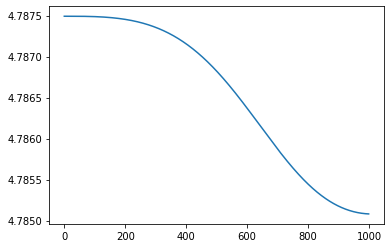

In [64]:
plt.plot(total_cost)
plt.show

In [65]:
def predict(parameters ,X):
    A2 ,cache = forward_propagation(X ,parameters)
    
    prediction = np.round(A2)
    return prediction

In [66]:
def one_hot_encoding(C ,y):     #C is no_of_classes in the dataset
    label = (np.eye(C)[y.reshape(-1)]).T
    return label

#label_test = one_hot_encoding(3, yt_test)
#label_test.shape

In [68]:
y_pre = []
yh_pred = predict(parameters , xt_test)
for i in range (yh_pred.shape[1]):
    j =0;
    j =np.argmax(yh_pred)
    y_pre.append(j)
y_pre = np.array(y_pre).reshape(30,1)    
    





In [69]:
actual = yt_test.astype('float')
predicted = y_pre.astype('float')


In [70]:
results = confusion_matrix(actual, predicted) 
accu_predicted=accuracy_score(actual, predicted)
precison=precision_score(actual, predicted, average=None)
recall=recall_score(actual, predicted,average=None)
F1=f1_score(actual, predicted,average=None)
report=classification_report(actual, predicted)

print("Confusion Matrix:")
print(results)
print("Predicted Accuarcy :")
print(accu_predicted)
print("Precison score :")
print(precison)
print("Recall score :")
print(recall)
print("F1 score :")
print(F1)
print("Accuracy Report :",report) 

Confusion Matrix:
[[11  0  0]
 [13  0  0]
 [ 6  0  0]]
Predicted Accuarcy :
0.36666666666666664
Precison score :
[0.36666667 0.         0.        ]
Recall score :
[1. 0. 0.]
F1 score :
[0.53658537 0.         0.        ]
Accuracy Report :               precision    recall  f1-score   support

         0.0       0.37      1.00      0.54        11
         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



C:\Users\Milimd\Anaconda3\anaconda7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Milimd\Anaconda3\anaconda7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Milimd\Anaconda3\anaconda7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                            """SOLUTION 4"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X = boston[['RM','LSTAT','PTRATIO']]
y = boston_dataset['target']
y = y.reshape(y.shape[0] ,1)
X = X.to_numpy()

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [3]:
xt_train = x_train.T/100
xt_test = x_test.T/100
yt_train = y_train.T/100
yt_test = y_test.T/100
print(xt_train.shape ,yt_train.shape)

(3, 404) (1, 404)


In [4]:
def forward_prop(X ,W ,b):
    z =np.dot(W.T,X) +b
    return z

In [5]:
def mean_square_error( y_pred, y_true):
        return ((y_pred - y_true) ** 2)
def huber_loss(y_true,y_hat):
    delta = 1.
    return np.where(np.abs(y_true-y_hat) < delta,.5*(y_true-y_hat)**2 , delta*(np.abs(y_true-y_hat)-0.5*delta))
def square_epsilon_hinge_loss(y_true,y_hat):
    epsilon = 0.1
    loss = 0.5*(np.maximum(((y_hat-y_true)**2-epsilon**2),0.0))
    return loss
def mae_loss(y_true,y_pred):
    return np.abs(y_true-y_pred)

In [6]:
total_loss = []
lr =.01
epochs=500


In [7]:
w = np.zeros((3,1))
b = 1
z =forward_prop(xt_train,w,b)
z.shape


(1, 404)

In [8]:
for i in range(epochs):
    yh = forward_prop(xt_train ,w ,b)
    #print(yh.shape)
    delta = yh - yt_train
    #print(delta.shape)
    loss = np.sum(mean_square_error(yt_train,yh))/(2 * 404)
    dw = (np.dot(delta ,xt_train.T).T)/404
    db =  np.sum(delta)/404
    w = w - lr * dw
    b = b - lr * db
    #print(loss)
    total_loss.append(loss)

    

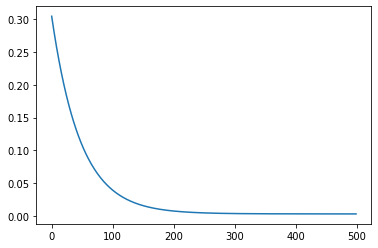

In [9]:
#mse loss
plt.plot(total_loss)
plt.show()

In [10]:
#HUBER LOSS
w = np.zeros((3,1))
b = 1
for i in range(epochs):
    yh = forward_prop(xt_train ,w ,b)
    #print(yh.shape)
    delta = yh - yt_train
    #print(delta.shape)
    loss = np.sum(huber_loss(yt_train,yh))/(2 * 404)
    dw = (np.dot(delta ,xt_train.T).T)/404
    db =  np.sum(delta)/404
    w = w - lr * dw
    b = b - lr * db
    #print(loss)
    total_loss.append(loss)


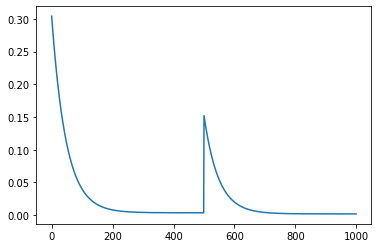

In [11]:
#huber loss
plt.plot(total_loss)
plt.show()

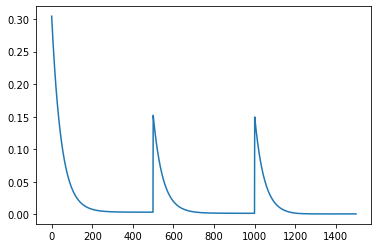

In [12]:
#square epsilon hinge loss
w = np.zeros((3,1))
b = 1
for i in range(epochs):
    yh = forward_prop(xt_train ,w ,b)
    #print(yh.shape)
    delta = yh - yt_train
    #print(delta.shape)
    loss = np.sum(square_epsilon_hinge_loss(yt_train,yh))/(2 * 404)
    dw = (np.dot(delta ,xt_train.T).T)/404
    db =  np.sum(delta)/404
    w = w - lr * dw
    b = b - lr * db
    #print(loss)
    total_loss.append(loss)
plt.plot(total_loss)
plt.show()

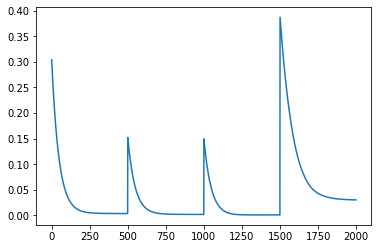

In [13]:
w = np.zeros((3,1))
b = 1
for i in range(epochs):
    yh = forward_prop(xt_train ,w ,b)
    #print(yh.shape)
    delta = yh - yt_train
    #print(delta.shape)
    loss = np.sum(mae_loss(yt_train,yh))/(2 * 404)
    dw = (np.dot(delta ,xt_train.T).T)/404
    db =  np.sum(delta)/404
    w = w - lr * dw
    b = b - lr * db
    #print(loss)
    total_loss.append(loss)
plt.plot(total_loss)
plt.show()

In [ ]:
                                            #solution 5

In [45]:
import matplotlib.pyplot as plt

In [24]:
from sklearn import datasets
import numpy as np
data = datasets.load_breast_cancer()
X = data['data']
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
xt_train = X_train.T/100
xt_test = X_test.T/100
y_train = (y_train.T).reshape(1,y_train.shape[0])
y_test = (y_test.T).reshape(1,y_test.shape[0])
print(xt_train.shape)
print(xt_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 455)
(30, 114)
(1, 455)
(1, 114)


In [26]:
def layer_size(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 10
    return (n_x,n_h,n_y)

In [27]:
(n_x,n_h,n_y)=layer_size(xt_train,y_train)
print(n_x,n_h,n_y)

30 10 1


In [28]:
def ini_parameter(n_x ,n_h ,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h ,n_x) * .01
    b1 =np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* .01
    b2 = np.zeros((n_y ,1))
    
   
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [29]:
ini_parameter(n_x,n_h,n_y)

{'W1': array([[-4.16757847e-03, -5.62668272e-04, -2.13619610e-02,
          1.64027081e-02, -1.79343559e-02, -8.41747366e-03,
          5.02881417e-03, -1.24528809e-02, -1.05795222e-02,
         -9.09007615e-03,  5.51454045e-03,  2.29220801e-02,
          4.15393930e-04, -1.11792545e-02,  5.39058321e-03,
         -5.96159700e-03, -1.91304965e-04,  1.17500122e-02,
         -7.47870949e-03,  9.02525097e-05, -8.78107893e-03,
         -1.56434170e-03,  2.56570452e-03, -9.88779049e-03,
         -3.38821966e-03, -2.36184031e-03, -6.37655012e-03,
         -1.18761229e-02, -1.42121723e-02, -1.53495196e-03],
        [-2.69056960e-03,  2.23136679e-02, -2.43476758e-02,
          1.12726505e-03,  3.70444537e-03,  1.35963386e-02,
          5.01857207e-03, -8.44213704e-03,  9.76147160e-08,
          5.42352572e-03, -3.13508197e-03,  7.71011738e-03,
         -1.86809065e-02,  1.73118467e-02,  1.46767801e-02,
         -3.35677339e-03,  6.11340780e-03,  4.79705919e-04,
         -8.29135289e-03,  8.7710

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))



In [34]:
def forward_propagation(X , parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) +b1
    
    A1 =np.tanh(Z1)
   
    Z2 = np.dot(W2,A1) + b2
   
    A2 =sigmoid(Z2)
    
    
    cache = {"Z1":Z1,
            "A1" : A1,
             "Z2" : Z2,
            "A2" : A2}
    
    return A2,cache

In [31]:
def compute_cost(A2 ,Y , parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) /m
    cost = float(np.squeeze(cost))
    return cost


In [32]:
def backward_propogation(parameters,cache,X,Y):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    A1= cache["A1"]
    Z1 =cache["Z1"]
    A2 =cache["A2"]
    Z2 =cache["Z2"]
    
    m =X.shape[1]
    dZ2 = A2 -Y
    dW2= 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2 ,axis=1,keepdims =True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = 1/m * np.dot(dZ1 ,X.T)
    db1= 1/m * np.sum(dZ1 ,axis =1 ,keepdims = True)
    
    grads = {"dW2":dW2,
            "db2":db2,
            "dW1" : dW1,
            "db1": db1}
    
    return grads

In [33]:
def update_parameters(parameters ,grads ,lr):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - lr * dW1
    b1 = b1 -lr *db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    
    parameters={"W1" : W1,
               "b1" : b1,
               "W2" : W2,
               "b2" : b2}
    return parameters

In [52]:
def nn_model(X,Y,num_iter ,print_cost =False):
    np.random.seed(3)
    (n_x,n_h,n_y) = layer_size(X,Y)
    parameters =ini_parameter(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    total_cost = []
    
    for i in range(0,num_iter):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        total_cost.append(cost)
        grads = backward_propogation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads ,0.01)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return parameters,total_cost

In [53]:
parameters ,total_cost = nn_model(xt_train, y_train ,num_iter=10000, print_cost=True)

Cost after iteration 0: 0.692782
Cost after iteration 1000: 0.382343
Cost after iteration 2000: 0.210437
Cost after iteration 3000: 0.181416
Cost after iteration 4000: 0.172781
Cost after iteration 5000: 0.168932
Cost after iteration 6000: 0.166592
Cost after iteration 7000: 0.164812
Cost after iteration 8000: 0.163252
Cost after iteration 9000: 0.161769


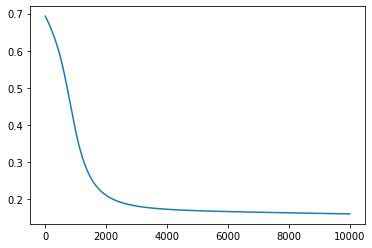

In [54]:
plt.plot(total_cost)
plt.show()

In [55]:
def predict(parameters ,X):
    A2 ,cache = forward_propagation(X ,parameters)
    
    prediction = np.round(A2)
    return prediction

In [58]:
yh_pred = predict(parameters,xt_test)
print(y_test.shape)
print(yh_pred.shape)
actual=y_test[0]

predicted = yh_pred[0]

(1, 114)
(1, 114)


In [60]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 

In [61]:
results = confusion_matrix(actual, predicted) 
accu_predicted=accuracy_score(actual, predicted)
precison=precision_score(actual, predicted, average=None)
recall=recall_score(actual, predicted,average=None)
F1=f1_score(actual, predicted,average=None)
report=classification_report(actual, predicted)

print("Confusion Matrix:")
print(results)
print("Predicted Accuarcy :")
print(accu_predicted)
print("Precison score :")
print(precison)
print("Recall score :")
print(recall)
print("F1 score :")
print(F1)
print("Accuracy Report :",report)

Confusion Matrix:
[[37  5]
 [ 2 70]]
Predicted Accuarcy :
0.9385964912280702
Precison score :
[0.94871795 0.93333333]
Recall score :
[0.88095238 0.97222222]
F1 score :
[0.91358025 0.95238095]
Accuracy Report :               precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [63]:
def tseversky_loss( y_enc, output):
        beta = 0.5
        num = output*y_enc
        denom = num+beta*(1-y_enc)*output+(1-beta)*y_enc*(1-output)
        cost = num/denom
        return cost

In [66]:
def nn_model(X,Y,num_iter ,print_cost =False):
    np.random.seed(3)
    (n_x,n_h,n_y) = layer_size(X,Y)
    parameters =ini_parameter(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    total_cost = []
    
    for i in range(0,num_iter):
        A2, cache = forward_propagation(X, parameters)
        cost = tseversky_loss(A2, Y)
        total_cost.append(cost)
        grads = backward_propogation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads ,0.01)
        
    

    return parameters,total_cost

In [67]:
parameters ,total_cost = nn_model(xt_train, y_train ,num_iter=10000, print_cost=True)

In [70]:
def predict(parameters ,X):
    A2 ,cache = forward_propagation(X ,parameters)
    
    prediction = np.round(A2)
    return prediction

In [71]:
yh_pred = predict(parameters,xt_test)
print(y_test.shape)
print(yh_pred.shape)
actual=y_test[0]

predicted = yh_pred[0]

(1, 114)
(1, 114)


In [72]:
results = confusion_matrix(actual, predicted) 
accu_predicted=accuracy_score(actual, predicted)
precison=precision_score(actual, predicted, average=None)
recall=recall_score(actual, predicted,average=None)
F1=f1_score(actual, predicted,average=None)
report=classification_report(actual, predicted)

print("Confusion Matrix:")
print(results)
print("Predicted Accuarcy :")
print(accu_predicted)
print("Precison score :")
print(precison)
print("Recall score :")
print(recall)
print("F1 score :")
print(F1)
print("Accuracy Report :",report)

Confusion Matrix:
[[37  5]
 [ 2 70]]
Predicted Accuarcy :
0.9385964912280702
Precison score :
[0.94871795 0.93333333]
Recall score :
[0.88095238 0.97222222]
F1 score :
[0.91358025 0.95238095]
Accuracy Report :               precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
                                            #solution 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.special import expit
import sys
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 

In [13]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

x = X[0:100,0:2]
Y = y[0:100]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.1, random_state=1)

In [20]:
xt_train = X_train.T/100
xt_test = X_test.T/100
y_train = (y_train.T).reshape(1,y_train.shape[0])
y_test = (y_test.T).reshape(1,y_test.shape[0])
print(xt_train.shape)
print(xt_test.shape)
print(y_train.shape)
print(y_test.shape)

(2, 90)
(2, 10)
(1, 90)
(1, 10)


In [44]:
def layer_size(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 2
    return (n_x,n_h,n_y)

In [23]:
(n_x,n_h,n_y)=layer_size(xt_train,y_train)
print(n_x,n_h,n_y)

2 3 1


In [30]:
def ini_parameters(n_x ,n_h ,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h ,n_x) * .01
    b1 =np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* .01
    b2 = np.zeros((n_y ,1))
    
   
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [25]:
ini_parameters(n_x,n_h,n_y)

{'W1': array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747]]), 'b1': array([[0.],
        [0.],
        [0.]]), 'W2': array([[ 0.00502881, -0.01245288, -0.01057952]]), 'b2': array([[0.]])}

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [27]:
def softmax(a):                                
    z = np.exp(a)
    s = np.sum(z , axis =1 ,keepdims = True)
    return z/s

In [32]:
def forward_propagation(X ,parameters):
    W1= parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1=np.dot(W1 ,X) +b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2 ,A1) +b2
    A2 = softmax(Z2)
   # print(A2.shape)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1" : Z1,
            "Z2" : Z2,
            "A1" : A1,
            "A2" : A2}
    return A2 ,cache

In [34]:
parameters = ini_parameters(n_x,n_h,n_y)
(A2 ,cache) = forward_propagation(xt_train , parameters)
print(A2.shape)

(1, 90)


In [47]:
def compute_cost(A2, Y ,parameters):
    m =Y.shape[1]
    cost= -np.sum(np.log(A2) * Y , axis =1 , keepdims = True)
    cost = cost/m
    loss = np.sum(cost , axis =0 ,keepdims =True)
    return loss

In [37]:
def backward_propogation(parameters ,cache,X ,Y):
    m =Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2 ,A1.T)
    db2 = 1/m *np.sum(dZ2 ,axis =1 ,keepdims =True)
    dZ1 = np.dot(W2.T,dZ2) * sigmoid(A1) * sigmoid(1 - A1)
    dW1 = 1/m * np.dot(dZ1 , X.T)
    db1 = 1/m * np.sum(dZ1 , axis =1 , keepdims = True)
    
    grads = {"dW2" : dW2,
            "dW1" : dW1,
            "db1" : db1,
            "db2" : db2}
    return grads

In [38]:
def update_parameters(parameters ,grads ,lr):
    W1 =parameters["W1"]
    W2 = parameters["W2"]
    b1 =parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]  
    
    W1 = W1  - lr * dW1
    b1 = b1 -  lr * db1
    W2 = W2 -  lr * dW2
    b2 = b2 -  lr * db2
    
    parameters = {"W1" :W1,
                 "b1" :b1 ,
                 "W2" : W2,
                 "b2" :b2}
    return parameters

In [67]:
def nn_model(X,Y ,num_iter ,print_cost = False):
    #np.random.seed(3)
    n_x ,n_h,n_y = layer_size(X ,Y)
    
    parameters = ini_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    total_cost = []
    for i in range(0 ,num_iter):
        A2 ,cache = forward_propagation(X,parameters)
        
        cost = compute_cost(A2 ,Y ,parameters)
        total_cost.append(cost[0])
        
        grads = backward_propogation(parameters ,cache ,X, Y)
        
        parameters = update_parameters(parameters ,grads  ,.01)
        
        
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
   
    
    return parameters,total_cost

In [68]:
parameters,total_cost  = nn_model(xt_train, y_train, num_iter=1000, print_cost=True)



Cost after iteration 0: 2.149909
Cost after iteration 50: 2.149911
Cost after iteration 100: 2.149914
Cost after iteration 150: 2.149916
Cost after iteration 200: 2.149917
Cost after iteration 250: 2.149918
Cost after iteration 300: 2.149918
Cost after iteration 350: 2.149916
Cost after iteration 400: 2.149913
Cost after iteration 450: 2.149908
Cost after iteration 500: 2.149901
Cost after iteration 550: 2.149893
Cost after iteration 600: 2.149882
Cost after iteration 650: 2.149870
Cost after iteration 700: 2.149857
Cost after iteration 750: 2.149844
Cost after iteration 800: 2.149832
Cost after iteration 850: 2.149821
Cost after iteration 900: 2.149814
Cost after iteration 950: 2.149810


<function matplotlib.pyplot.show(*args, **kw)>

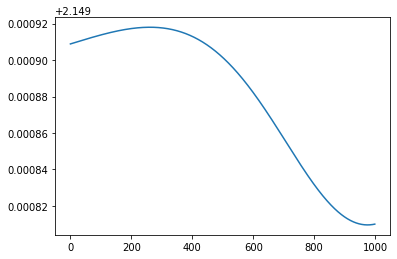

In [69]:
plt.plot(total_cost)
plt.show

In [70]:
def predict(parameters ,X):
    A2 ,cache = forward_propagation(X ,parameters)
    
    prediction = np.round(A2)
    return prediction

In [71]:
yh_pred = predict(parameters,xt_test)
print(y_test.shape)
print(yh_pred.shape)
actual=y_test[0]

predicted = yh_pred[0]

(1, 10)
(1, 10)


In [72]:
results = confusion_matrix(actual, predicted) 
accu_predicted=accuracy_score(actual, predicted)
precison=precision_score(actual, predicted, average=None)
recall=recall_score(actual, predicted,average=None)
F1=f1_score(actual, predicted,average=None)
report=classification_report(actual, predicted)

print("Confusion Matrix:")
print(results)
print("Predicted Accuarcy :")
print(accu_predicted)
print("Precison score :")
print(precison)
print("Recall score :")
print(recall)
print("F1 score :")
print(F1)
print("Accuracy Report :",report)

Confusion Matrix:
[[3 0]
 [7 0]]
Predicted Accuarcy :
0.3
Precison score :
[0.3 0. ]
Recall score :
[1. 0.]
F1 score :
[0.46153846 0.        ]
Accuracy Report :               precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       0.00      0.00      0.00         7

    accuracy                           0.30        10
   macro avg       0.15      0.50      0.23        10
weighted avg       0.09      0.30      0.14        10



C:\Users\Milimd\Anaconda3\anaconda7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Milimd\Anaconda3\anaconda7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Milimd\Anaconda3\anaconda7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
